# Asset Selection

In [38]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from sklearn import covariance

import datetime as dt
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns

import pickle as pk
import requests

import random

jtplot.style(figsize=(15, 9))

In [3]:
# import bs4 as bs

# response = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
# soup = bs.BeautifulSoup(response.text)
# table = soup.find('table', {'class': 'wikitable sortable'})

# tickers = []
# for row in table.findAll('tr')[1:]:
#     ticker = row.findAll('td')[0].text.replace('\n', '')
#     if '.' in ticker:
#         ticker = ticker.replace('.', '-')
#     tickers.append(ticker)

# with open('../data/sp500tickers.pickle', 'wb') as f:
#     pk.dump(tickers, f)

# print('---------------')
# print(f'Ticker Amount: {len(tickers)}')
# print('---------------')

# with open('../data/sp500tickers.pickle', 'rb') as f:
#     sp500 = pk.load(f)

# with open('../../../alphavantage_token.TXT', 'rb') as f:
#     TOKEN = f.read().decode('utf-8')

# for ticker in sp500[501:]:
#     url = f'https://www.alphavantage.co/query?function=OVERVIEW&symbol={ticker}&apikey={TOKEN}'
#     r = requests.get(url)
#     data.loc[ticker] = r.json()

# data.to_csv('../data/sp500_Company_Overview.csv')

# data.head()

---------------
Ticker Amount: 503
---------------


In [3]:
d = {'Symbol': 'MMM', 'AssetType': 'Common Stock', 'Name': '3M Company',
     'Description': 'ood, a suburb of Saint Paul, Minnesota.',
     'CIK': '66740', 'Exchange': 'NYSE', 'Currency': 'USD',
     'Country': 'USA', 'Sector': 'LIFE SCIENCES',
     'Industry': 'SURGICAL & MEDICAL INSTRUMENTS & APPARATUS',
     'Address': '3M CENTER, BLDG. 220-13E-26A, ST PAUL, MN, US',
     'FiscalYearEnd': 'December', 'LatestQuarter': '2024-03-31',
     'MarketCapitalization': '57903698000', 'EBITDA': '8146000000',
     'PERatio': 'None', 'PEGRatio': '1.905', 'BookValue': '8.79',
     'DividendPerShare': '6.01', 'DividendYield': '0.0268',
     'EPS': '-12.73', 'RevenuePerShareTTM': '58.89',
     
     'ProfitMargin': '-0.216', 'OperatingMarginTTM': '0.217',
     'ReturnOnAssetsTTM': '0.0758', 
     
     'ReturnOnEquityTTM': '-0.693',
     'RevenueTTM': '32653001000', 'GrossProfitTTM': '15000000000',
     'DilutedEPSTTM': '-12.73', 'QuarterlyEarningsGrowthYOY': '-0.051',
     'QuarterlyRevenueGrowthYOY': '-0.003', 'AnalystTargetPrice': '110',
     'AnalystRatingStrongBuy': '0', 'AnalystRatingBuy': '5',
     'AnalystRatingHold': '11', 'AnalystRatingSell': '2',
     'AnalystRatingStrongSell': '0', 'TrailingPE': '-',
     'ForwardPE': '10.6', 'PriceToSalesRatioTTM': '1.546',
     'PriceToBookRatio': '10.51', 'EVToRevenue': '1.879',
     'EVToEBITDA': '-9.08', 'Beta': '1.001', '52WeekHigh': '105.31',
     '52WeekLow': '68.63', '50DayMovingAverage': '101.16',
     '200DayMovingAverage': '97.91', 'SharesOutstanding': '553361000',
     'DividendDate': '2024-06-12', 'ExDividendDate': '2024-05-23'}
d.keys()

dict_keys(['Symbol', 'AssetType', 'Name', 'Description', 'CIK', 'Exchange', 'Currency', 'Country', 'Sector', 'Industry', 'Address', 'FiscalYearEnd', 'LatestQuarter', 'MarketCapitalization', 'EBITDA', 'PERatio', 'PEGRatio', 'BookValue', 'DividendPerShare', 'DividendYield', 'EPS', 'RevenuePerShareTTM', 'ProfitMargin', 'OperatingMarginTTM', 'ReturnOnAssetsTTM', 'ReturnOnEquityTTM', 'RevenueTTM', 'GrossProfitTTM', 'DilutedEPSTTM', 'QuarterlyEarningsGrowthYOY', 'QuarterlyRevenueGrowthYOY', 'AnalystTargetPrice', 'AnalystRatingStrongBuy', 'AnalystRatingBuy', 'AnalystRatingHold', 'AnalystRatingSell', 'AnalystRatingStrongSell', 'TrailingPE', 'ForwardPE', 'PriceToSalesRatioTTM', 'PriceToBookRatio', 'EVToRevenue', 'EVToEBITDA', 'Beta', '52WeekHigh', '52WeekLow', '50DayMovingAverage', '200DayMovingAverage', 'SharesOutstanding', 'DividendDate', 'ExDividendDate'])

In [2]:
data = pd.read_csv('../data/sp500_Company_Overview.csv', index_col=0)
data.head()

,AssetType,Name,Description,CIK,Exchange,Currency,Country,Sector,Industry,Address,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Symbol,,,,,,,,,,,,,,,,,,,,,
MMM,Common Stock,3M Company,The 3M Company is an American multinational co...,66740.0,NYSE,USD,USA,LIFE SCIENCES,SURGICAL & MEDICAL INSTRUMENTS & APPARATUS,"3M CENTER, BLDG. 220-13E-26A, ST PAUL, MN, US",...,1.879,-9.08,1.001,105.52,68.63,101.50,98.13,5.533610e+08,2024-06-12,2024-05-23
AOS,Common Stock,Smith AO Corporation,A. O. Smith Corporation is an American manufac...,91142.0,NYSE,USD,USA,MANUFACTURING,HOUSEHOLD APPLIANCES,"11270 WEST PARK PLACE, MILWAUKEE, WI, US",...,3.248,15.19,1.141,92.44,63.34,83.92,81.37,1.207840e+08,2024-08-15,2024-07-31
ABT,Common Stock,Abbott Laboratories,Abbott Laboratories is an American multination...,1800.0,NYSE,USD,USA,LIFE SCIENCES,PHARMACEUTICAL PREPARATIONS,"100 ABBOTT PARK ROAD, ABBOTT PARK, IL, US",...,4.928,18.75,0.718,120.40,88.33,103.84,106.60,1.739630e+09,2024-08-15,2024-07-15
ABBV,Common Stock,AbbVie Inc,AbbVie is an American publicly traded biopharm...,1551152.0,NYSE,USD,USA,LIFE SCIENCES,PHARMACEUTICAL PREPARATIONS,"1 NORTH WAUKEGAN ROAD, NORTH CHICAGO, IL, US",...,6.15,19.45,0.623,179.55,132.11,166.45,162.53,1.765870e+09,2024-08-15,2024-07-15
ACN,Common Stock,Accenture plc,Accenture plc is an Irish-domiciled multinatio...,1467373.0,NYSE,USD,USA,TRADE & SERVICES,"SERVICES-BUSINESS SERVICES, NEC","1 GRAND CANAL SQUARE, GRAND CANAL HARBOUR, DUB...",...,3.041,18.21,1.227,384.33,277.47,301.44,329.36,6.263840e+08,2024-08-15,2024-07-11


In [3]:
data.drop(['AssetType',
           'CIK',
           'Description',
           'Currency',
           'Country',
           'Address',
           'DividendPerShare'
          ], inplace=True, axis=1)

In [4]:
data['ReturnOnAssetsTTM'].replace('None', np.nan, inplace=True)
data['Beta'].replace('None', np.nan, inplace=True)
data['PEGRatio'].replace('None', np.nan, inplace=True)
data['PERatio'].replace('None', np.nan, inplace=True)
data['BookValue'].replace('None', np.nan, inplace=True)
data['DividendYield'].replace('None', np.nan, inplace=True)
data['EPS'].replace('None', np.nan, inplace=True)
data['RevenuePerShareTTM'].replace('None', np.nan, inplace=True)
data['ProfitMargin'].replace('None', np.nan, inplace=True)
data['OperatingMarginTTM'].replace('None', np.nan, inplace=True)
data['MarketCapitalization'].replace('None', np.nan, inplace=True)
data['EBITDA'].replace('None', np.nan, inplace=True)

In [5]:
data['MarketCapitalization'] = data['MarketCapitalization'].astype(float)
data['Beta'] = data['Beta'].astype(float)
data['PEGRatio'] = data['PEGRatio'].astype(float)
data['PERatio'] = data['PERatio'].astype(float)
data['BookValue'] = data['BookValue'].astype(float)
data['DividendYield'] = data['DividendYield'].astype(float)
data['EPS'] = data['EPS'].astype(float)
data['RevenuePerShareTTM'] = data['RevenuePerShareTTM'].astype(float)
data['ProfitMargin'] = data['ProfitMargin'].astype(float)
data['OperatingMarginTTM'] = data['OperatingMarginTTM'].astype(float)
data['ReturnOnAssetsTTM'] = data['ReturnOnAssetsTTM'].astype(float)
data['EBITDA'] = data['EBITDA'].astype(float)

## Multiplicators

In [6]:
clmns = ['Name',
         'MarketCapitalization',
         'Sector',
         'Industry',
         'BookValue',
         'PERatio',
         'PEGRatio',
         'EPS',
         'Beta',
         'DividendYield']

In [7]:
cat = data.copy()

### Market Capitalization

In [8]:
data['MarketCapitalization'].describe()

count    4.830000e+02
mean     9.795889e+10
std      2.853620e+11
min      7.004214e+09
25%      1.879910e+10
50%      3.613379e+10
75%      7.374368e+10
max      3.450326e+12
Name: MarketCapitalization, dtype: float64

In [9]:
market_cap = data['MarketCapitalization']
bins = pd.qcut(market_cap, 3)
results = (pd.Series(market_cap).groupby(bins).agg(['count', 'min', 'max']).reset_index())
results

,MarketCapitalization,count,min,max
0,"(7004213999.999, 22310309333.333]",161,7.004214e+09,2.230288e+10
1,"(22310309333.333, 53683909666.667]",161,2.231402e+10,5.367738e+10
2,"(53683909666.667, 3450325697000.0]",161,5.369698e+10,3.450326e+12


In [10]:
cat['market_cap_bins'] = bins
cat.groupby(['Sector', 'market_cap_bins']).count()['Name'].to_frame()

Name
Sector                     market_cap_bins                         
ENERGY & TRANSPORTATION    (7004213999.999, 22310309333.333]     19
                           (22310309333.333, 53683909666.667]    32
                           (53683909666.667, 3450325697000.0]    19
FINANCE                    (7004213999.999, 22310309333.333]     19
                           (22310309333.333, 53683909666.667]    17
                           (53683909666.667, 3450325697000.0]    27
LIFE SCIENCES              (7004213999.999, 22310309333.333]     26
                           (22310309333.333, 53683909666.667]    23
                           (53683909666.667, 3450325697000.0]    28
MANUFACTURING              (7004213999.999, 22310309333.333]     38
                           (22310309333.333, 53683909666.667]    27
                           (53683909666.667, 3450325697000.0]    29
REAL ESTATE & CONSTRUCTION (7004213999.999, 22310309333.333]     16
                           (22310309333.333, 53683909666.667]    18
                           (53683909666.667, 3450325697000.0]     7
TECHNOLOGY                 (7004213999.999, 22310309333.333]     21
                           (22310309333.333, 53683909666.667]    17
                           (53683909666.667, 3450325697000.0]    28
TRADE & SERVICES           (7004213999.999, 22310309333.333]     22
                           (22310309333.333, 53683909666.667]    27
                           (53683909666.667, 3450325697000.0]    23

In [11]:
data.sort_values(by='MarketCapitalization', ascending=False).head(10)

,Name,Exchange,Sector,Industry,FiscalYearEnd,LatestQuarter,MarketCapitalization,EBITDA,PERatio,PEGRatio,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,Apple Inc,NASDAQ,TECHNOLOGY,ELECTRONIC COMPUTERS,September,2024-03-31,3.450326e+12,1.296290e+11,34.94,2.351,...,9.11,26.13,1.244,237.23,163.86,207.76,187.90,1.533410e+10,2024-05-16,2024-05-10
MSFT,Microsoft Corporation,NASDAQ,TECHNOLOGY,SERVICES-PREPACKAGED SOFTWARE,June,2024-06-30,3.036322e+12,1.294330e+11,34.59,2.200,...,12.35,22.76,0.894,468.35,307.70,438.57,403.82,7.433040e+09,2024-09-12,2024-08-15
GOOG,Alphabet Inc Class C,NASDAQ,TECHNOLOGY,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING...",December,2024-03-31,2.254508e+12,1.097230e+11,28.08,1.659,...,6.14,19.27,1.046,193.31,121.32,180.07,152.99,5.617000e+09,2024-06-17,2024-06-10
GOOGL,Alphabet Inc Class A,NASDAQ,TECHNOLOGY,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING...",December,2024-03-31,2.254507e+12,1.097230e+11,27.86,1.669,...,6.99,20.42,1.046,191.75,120.07,179.13,152.33,5.874000e+09,2024-06-17,2024-06-10
AMZN,Amazon.com Inc,NASDAQ,TRADE & SERVICES,RETAIL-CATALOG & MAIL-ORDER HOUSES,December,2024-03-31,1.899725e+12,9.660900e+10,50.99,1.987,...,3.268,19.57,1.155,201.20,118.35,187.51,167.96,1.040660e+10,None,None
META,Meta Platforms Inc.,NASDAQ,TECHNOLOGY,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING...",December,2024-06-30,1.234906e+12,7.477400e+10,24.94,1.130,...,8.11,16.48,1.212,542.81,273.82,492.57,433.53,2.184730e+09,2024-06-26,2024-06-14
BRK-B,Berkshire Hathaway Inc,NYSE,FINANCE,"FIRE, MARINE & CASUALTY INSURANCE",December,2024-03-31,9.302838e+11,1.070460e+11,12.73,10.060,...,2.189,-,0.869,449.25,330.58,414.31,387.93,1.311380e+09,None,None
LLY,Eli Lilly and Company,NYSE,LIFE SCIENCES,PHARMACEUTICAL PREPARATIONS,December,2024-03-31,7.243399e+11,1.337370e+10,117.78,1.304,...,20.82,77.19,0.409,966.10,447.24,867.06,726.83,9.004050e+08,2024-09-10,2024-08-15
AVGO,Broadcom Inc,NASDAQ,MANUFACTURING,SEMICONDUCTORS & RELATED DEVICES,October,2024-04-30,7.044695e+11,2.129100e+10,64.95,1.560,...,17.67,34.54,1.188,184.58,78.56,154.44,123.90,4.654880e+09,2024-06-28,2024-06-24


In [12]:
data.sort_values(by='MarketCapitalization').head(10)

,Name,Exchange,Sector,Industry,FiscalYearEnd,LatestQuarter,MarketCapitalization,EBITDA,PERatio,PEGRatio,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Symbol,,,,,,,,,,,,,,,,,,,,,
NCLH,Norwegian Cruise Line Holdings Ltd,NYSE,ENERGY & TRANSPORTATION,WATER TRANSPORTATION,December,2024-03-31,7.004214e+09,2.153200e+09,16.42,0.311,...,2.184,9.23,2.697,21.73,12.71,17.99,17.49,439687000.0,None,None
CZR,Caesars Entertainment Corporation,NASDAQ,REAL ESTATE & CONSTRUCTION,HOTELS & MOTELS,December,2024-03-31,7.183762e+09,3.714000e+09,9.39,0.824,...,2.84,9.21,2.985,59.50,31.74,36.61,41.25,216053000.0,None,None
BWA,BorgWarner Inc,NYSE,MANUFACTURING,MOTOR VEHICLE PARTS & ACCESSORIES,December,2024-03-31,7.283981e+09,1.857000e+09,10.99,1.000,...,0.714,6.16,1.209,46.16,29.31,34.03,34.11,227838000.0,2024-06-17,2024-06-03
ETSY,Etsy Inc,NASDAQ,TRADE & SERVICES,"SERVICES-BUSINESS SERVICES, NEC",December,2024-03-31,7.493067e+09,4.262970e+08,29.26,1.109,...,3.342,23.06,2.020,97.44,55.08,61.42,68.39,116933000.0,None,None
PARA,Paramount Global Class B,NASDAQ,TECHNOLOGY,TELEVISION BROADCASTING STATIONS,December,2024-03-31,7.502204e+09,2.715000e+09,NaN,0.291,...,0.706,23.38,1.798,17.28,9.54,11.24,12.44,625998000.0,2024-10-01,2024-09-16
IVZ,Invesco Plc,NYSE,FINANCE,INVESTMENT ADVICE,December,2024-06-30,7.569538e+09,1.015800e+09,NaN,1.488,...,3.152,15.93,1.455,17.81,11.97,15.66,15.49,450032000.0,2024-09-04,2024-08-16
BBWI,Bath & Body Works Inc.,NYSE,TRADE & SERVICES,RETAIL-WOMEN'S CLOTHING STORES,January,2024-04-30,7.667985e+09,1.568000e+09,8.88,0.858,...,1.654,7.47,1.834,52.76,26.90,43.09,41.33,223231000.0,2024-06-21,2024-06-07
LW,Lamb Weston Holdings Inc,NYSE,MANUFACTURING,"CANNED, FROZEN & PRESERVD FRUIT, VEG & FOOD SP...",May,2024-05-31,8.180627e+09,1.411700e+09,11.43,1.735,...,1.849,8.72,0.732,110.32,52.67,79.34,92.62,143671000.0,2024-08-30,2024-08-02
DAY,Dayforce Inc.,NYSE,TECHNOLOGY,SERVICES-PREPACKAGED SOFTWARE,December,2024-03-31,8.228169e+09,2.384000e+08,157.91,5.360,...,5.57,30.72,1.268,75.53,47.08,52.83,63.16,157900000.0,None,None


### EBITDA

In [14]:
data['EBITDA'].describe()

count    4.570000e+02
mean     6.760717e+09
std      1.466607e+10
min     -4.107000e+09
25%      1.594898e+09
50%      2.849000e+09
75%      5.944000e+09
max      1.296290e+11
Name: EBITDA, dtype: float64

In [15]:
data[data['EBITDA']<0]

,Name,Exchange,Sector,Industry,FiscalYearEnd,LatestQuarter,MarketCapitalization,EBITDA,PERatio,PEGRatio,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Symbol,,,,,,,,,,,,,,,,,,,,,
ALB,Albemarle Corp,NYSE,LIFE SCIENCES,"PLASTIC MATERIALS, SYNTH RESINS & NONVULCAN EL...",December,2024-03-31,1.099700e+10,-3.170970e+08,33.9,1.508,...,1.851,22.45,1.575,213.26,90.02,110.11,123.88,117527000.0,2024-10-01,2024-09-13
MRNA,Moderna Inc,NASDAQ,LIFE SCIENCES,"BIOLOGICAL PRODUCTS, (NO DISGNOSTIC SUBSTANCES)",December,2024-06-30,3.328101e+10,-4.107000e+09,NaN,0.000,...,5.22,4.641,1.662,170.47,62.55,131.38,105.61,384396000.0,None,None


In [16]:
ebitda_cat = data['EBITDA']
bins = pd.qcut(ebitda_cat, 4)
results = (pd.Series(ebitda_cat).groupby(bins).agg(['count', 'min', 'max']).reset_index())
results

,EBITDA,count,min,max
0,"(-4107000064.001, 1594898000.0]",115,-4.107000e+09,1.594898e+09
1,"(1594898000.0, 2849000000.0]",114,1.612000e+09,2.849000e+09
2,"(2849000000.0, 5944000000.0]",114,2.858000e+09,5.944000e+09
3,"(5944000000.0, 129629004000.0]",114,5.989000e+09,1.296290e+11


In [17]:
cat['ebitda_cat_bins'] = bins
cat.groupby(['Sector', 'ebitda_cat_bins']).count()['Name'].to_frame()

Name
Sector                     ebitda_cat_bins                      
ENERGY & TRANSPORTATION    (-4107000064.001, 1594898000.0]     2
                           (1594898000.0, 2849000000.0]       13
                           (2849000000.0, 5944000000.0]       26
                           (5944000000.0, 129629004000.0]     29
FINANCE                    (-4107000064.001, 1594898000.0]     6
                           (1594898000.0, 2849000000.0]        9
                           (2849000000.0, 5944000000.0]       11
                           (5944000000.0, 129629004000.0]     11
LIFE SCIENCES              (-4107000064.001, 1594898000.0]    23
                           (1594898000.0, 2849000000.0]       20
                           (2849000000.0, 5944000000.0]       18
                           (5944000000.0, 129629004000.0]     16
MANUFACTURING              (-4107000064.001, 1594898000.0]    30
                           (1594898000.0, 2849000000.0]       21
                           (2849000000.0, 5944000000.0]       22
                           (5944000000.0, 129629004000.0]     21
REAL ESTATE & CONSTRUCTION (-4107000064.001, 1594898000.0]    12
                           (1594898000.0, 2849000000.0]       16
                           (2849000000.0, 5944000000.0]       11
                           (5944000000.0, 129629004000.0]      2
TECHNOLOGY                 (-4107000064.001, 1594898000.0]    26
                           (1594898000.0, 2849000000.0]       11
                           (2849000000.0, 5944000000.0]       10
                           (5944000000.0, 129629004000.0]     19
TRADE & SERVICES           (-4107000064.001, 1594898000.0]    16
                           (1594898000.0, 2849000000.0]       24
                           (2849000000.0, 5944000000.0]       16
                           (5944000000.0, 129629004000.0]     16

In [28]:
data.groupby(['Sector']).agg({'EBITDA': ['min', 'idxmin', 'max', 'idxmax'],
                              'Name': 'count'})

EBITDA                              Name
                                     min idxmin           max idxmax count
Sector                                                                    
ENERGY & TRANSPORTATION     9.464000e+08   EXPD  6.768900e+10    XOM    70
FINANCE                     3.844590e+08   MKTX  1.070460e+11  BRK-B    63
LIFE SCIENCES              -4.107000e+09   MRNA  3.305500e+10    MRK    77
MANUFACTURING               1.694130e+08   ENPH  2.129100e+10   AVGO    94
REAL ESTATE & CONSTRUCTION  7.140900e+08    FRT  7.003500e+09    AMT    41
TECHNOLOGY                  1.451520e+08   CRWD  1.296290e+11   AAPL    66
TRADE & SERVICES            1.580340e+08   INCY  9.660900e+10   AMZN    72

In [31]:
data.sort_values(by='EBITDA', ascending=False)[clmns].head(10)

,Name,MarketCapitalization,Sector,Industry,BookValue,PERatio,PEGRatio,Beta,DividendPerShare,DividendYield
Symbol,,,,,,,,,,
AAPL,Apple Inc,3.450326e+12,TECHNOLOGY,ELECTRONIC COMPUTERS,4.837,34.94,2.351,1.244,4.837,0.0044
MSFT,Microsoft Corporation,3.036322e+12,TECHNOLOGY,SERVICES-PREPACKAGED SOFTWARE,36.120,34.59,2.200,0.894,36.120,0.0073
GOOGL,Alphabet Inc Class A,2.254507e+12,TECHNOLOGY,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING...",23.650,27.86,1.669,1.046,23.650,0.0044
GOOG,Alphabet Inc Class C,2.254508e+12,TECHNOLOGY,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING...",23.650,28.08,1.659,1.046,23.650,0.0044
BRK-B,Berkshire Hathaway Inc,9.302838e+11,FINANCE,"FIRE, MARINE & CASUALTY INSURANCE",397506.280,12.73,10.060,0.869,397506.280,NaN
AMZN,Amazon.com Inc,1.899725e+12,TRADE & SERVICES,RETAIL-CATALOG & MAIL-ORDER HOUSES,20.830,50.99,1.987,1.155,20.830,NaN
META,Meta Platforms Inc.,1.234906e+12,TECHNOLOGY,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING...",61.890,24.94,1.130,1.212,61.890,0.0041
XOM,Exxon Mobil Corp,5.208165e+11,ENERGY & TRANSPORTATION,PETROLEUM REFINING,52.050,14.23,7.050,0.893,52.050,0.0327
VZ,Verizon Communications Inc,1.715379e+11,TECHNOLOGY,TELEPHONE COMMUNICATIONS (NO RADIOTELEPHONE),22.850,15.32,1.158,0.393,22.850,0.0653


### PERatio

In [19]:
data['PERatio'].describe()

count    452.000000
mean      32.480071
std       34.380641
min        3.444000
25%       16.375000
50%       24.350000
75%       35.802500
max      474.370000
Name: PERatio, dtype: float64

In [27]:
data[data['PERatio']<15].groupby(['Sector']).agg({'Name': 'count',
                                                  'PERatio': ['min', 'idxmin', 'mean', 'max', 'idxmax']})

Name PERatio                                
                           count     min idxmin       mean    max idxmax
Sector                                                                  
ENERGY & TRANSPORTATION       17   3.444    APA  10.336588  14.99   CTRA
FINANCE                       31   5.670     EG  11.905161  14.80    BAC
LIFE SCIENCES                  6   7.510     CE  11.306667  14.57    LYB
MANUFACTURING                 15   4.970     GM  10.261333  14.23     SW
REAL ESTATE & CONSTRUCTION     6   9.390    CZR  10.933333  13.34    MGM
TECHNOLOGY                     9   9.790      T  11.745556  13.88    HPE
TRADE & SERVICES              10   8.880   BBWI  12.262000  14.67   PYPL

In [20]:
data[(data['PERatio']<15) & (data['Sector']=='TECHNOLOGY')][clmns]

,Name,MarketCapitalization,Sector,Industry,BookValue,PERatio,PEGRatio,Beta,DividendYield
Symbol,,,,,,,,,
T,AT&T Inc,1.305688e+11,TECHNOLOGY,TELEPHONE COMMUNICATIONS (NO RADIOTELEPHONE),14.580,9.79,1.272,0.720,0.0610
CHTR,Charter Communications Inc,5.294831e+10,TECHNOLOGY,CABLE & OTHER PAY TELEVISION SERVICES,76.340,11.74,0.277,1.041,NaN
CMCSA,Comcast Corp,1.536995e+11,TECHNOLOGY,CABLE & OTHER PAY TELEVISION SERVICES,21.440,10.56,0.642,1.003,0.0312
DE,Deere & Company,1.065216e+11,TECHNOLOGY,FARM MACHINERY & EQUIPMENT,82.320,11.64,2.276,0.940,0.0152
FOXA,Fox Corp Class A,1.702525e+10,TECHNOLOGY,TELEVISION BROADCASTING STATIONS,22.540,12.12,1.009,0.781,0.0135
FOX,Fox Corp Class B,1.702762e+10,TECHNOLOGY,TELEVISION BROADCASTING STATIONS,22.540,11.29,0.927,0.781,0.0145
GDDY,Godaddy Inc,2.033356e+10,TECHNOLOGY,SERVICES-COMPUTER INTEGRATED SYSTEMS DESIGN,2.912,12.50,1.101,1.140,NaN
HPE,Hewlett Packard Enterprise Co,2.522665e+10,TECHNOLOGY,COMPUTER & OFFICE EQUIPMENT,16.700,13.88,2.080,1.211,0.0274
HPQ,HP Inc,3.531623e+10,TECHNOLOGY,COMPUTER & OFFICE EQUIPMENT,-0.936,12.19,8.510,1.106,0.0305


In [26]:
data[data['PERatio']>15].groupby(['Sector']).agg({'Name': 'count',
                                                  'PERatio': ['min', 'idxmin', 'mean', 'max', 'idxmax']})

Name PERatio                                 
                           count     min idxmin       mean     max idxmax
Sector                                                                   
ENERGY & TRANSPORTATION       51   15.22    PCG  26.001765  187.08    LUV
FINANCE                       30   15.03    WRB  26.095000   55.20    AJG
LIFE SCIENCES                 60   15.58    DVA  42.656833  216.81   GILD
MANUFACTURING                 71   15.71     ON  36.767465  225.90    AMD
REAL ESTATE & CONSTRUCTION    34   16.52    HST  47.112059  165.97    IRM
TECHNOLOGY                    53   15.32     VZ  48.018679  474.37   CRWD
TRADE & SERVICES              59   15.02    TGT  37.201356  158.71   INCY

### PEGRatio

In [22]:
data['PEGRatio'].describe()

count    478.000000
mean       5.230321
std       45.326822
min     -158.720000
25%        1.190750
50%        1.870000
75%        2.967500
max      844.200000
Name: PEGRatio, dtype: float64

In [25]:
data[data['PEGRatio']<1].groupby(['Sector']).agg({'Name': 'count',
                                                 'PEGRatio': ['min', 'idxmin', 'mean', 'max', 'idxmax']})

Name PEGRatio                                
                           count      min idxmin       mean    max idxmax
Sector                                                                   
ENERGY & TRANSPORTATION       15    0.170    APA   0.523200  0.956    FDX
FINANCE                       17 -158.720   CINF -11.739118  0.992   NTRS
LIFE SCIENCES                 11    0.000   MRNA   0.423418  0.888    JNJ
MANUFACTURING                 17    0.406   FSLR   0.732941  0.980    TDY
REAL ESTATE & CONSTRUCTION     7   -4.530    UDR  -0.093571  0.902      J
TECHNOLOGY                     9    0.277   CHTR   0.655000  0.960    BKR
TRADE & SERVICES               9    0.309    CAH   0.694667  0.995    CVS

In [24]:
data[data['PEGRatio']<0]

,Name,Exchange,Sector,Industry,FiscalYearEnd,LatestQuarter,MarketCapitalization,EBITDA,PERatio,PEGRatio,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Symbol,,,,,,,,,,,,,,,,,,,,,
CINF,Cincinnati Financial Corporation,NASDAQ,FINANCE,"FIRE, MARINE & CASUALTY INSURANCE",December,2024-06-30,1.940693e+10,2.849000e+09,9.09,-158.72,...,1.853,-,0.658,128.23,94.82,117.83,111.77,156240000.0,2024-07-15,2024-06-18
EG,Everest Group Ltd,NYSE,FINANCE,"FIRE, MARINE & CASUALTY INSURANCE",December,2024-03-31,1.668795e+10,NaN,5.67,-50.00,...,1.22,-,0.627,413.04,337.07,382.59,380.15,43458200.0,2024-06-14,2024-05-29
MOH,Molina Healthcare Inc,NYSE,FINANCE,HOSPITAL & MEDICAL SERVICE PLANS,December,2024-06-30,2.056274e+10,1.701000e+09,19.23,-0.62,...,0.381,8.33,0.579,423.92,282.96,308.99,354.36,58600000.0,None,None
UDR,UDR Inc,NYSE,REAL ESTATE & CONSTRUCTION,REAL ESTATE INVESTMENT TRUSTS,December,2024-06-30,1.553992e+10,9.984390e+08,102.12,-4.53,...,11.99,19.17,0.820,42.42,29.95,40.58,37.41,329824000.0,2024-07-31,2024-07-10


### BookValue

In [25]:
data['BookValue'].describe()

count       480.000000
mean        867.945490
std       18141.931073
min        -282.210000
25%          13.810000
50%          27.700000
75%          51.415000
max      397506.280000
Name: BookValue, dtype: float64

In [24]:
data.groupby(['Sector']).agg({'Name': 'count',
                              'BookValue': ['min', 'idxmin', 'mean', 'max', 'idxmax']})

Name BookValue                                 \
                           count       min idxmin         mean        max   
Sector                                                                      
ENERGY & TRANSPORTATION       70   -118.94   BKNG    33.130100     143.98   
FINANCE                       63     -0.67    AON  6380.612381  397506.28   
LIFE SCIENCES                 77     -7.18    MTD    43.232079     317.32   
MANUFACTURING                 94    -44.90    TDG    34.365419     198.53   
REAL ESTATE & CONSTRUCTION    41    -49.47   SBAC    66.788976    1337.72   
TECHNOLOGY                    66    -18.54   VRSN    30.866182      93.20   
TRADE & SERVICES              72   -282.21    AZO    14.915634     125.02   

                                   
                           idxmax  
Sector                             
ENERGY & TRANSPORTATION       MLM  
FINANCE                     BRK-B  
LIFE SCIENCES                 BIO  
MANUFACTURING                 TDY  
REAL ESTATE & CONSTRUCTION    NVR  
TECHNOLOGY                   SMCI  
TRADE & SERVICES              URI

In [27]:
bv_cat = data['BookValue']
bins = pd.qcut(bv_cat, 4)
results = (pd.Series(bv_cat).groupby(bins).agg(['count', 'min', 'max']).reset_index())
results

,BookValue,count,min,max
0,"(-282.21099999999996, 13.81]",121,-282.21,13.81
1,"(13.81, 27.7]",119,13.84,27.38
2,"(27.7, 51.415]",120,28.02,51.38
3,"(51.415, 397506.28]",120,51.52,397506.28


In [28]:
cat['bv_cat_bins'] = bins
df = cat.groupby(['Sector', 'bv_cat_bins']).count()['Name'].to_frame()
df

Name
Sector                     bv_cat_bins                       
ENERGY & TRANSPORTATION    (-282.21099999999996, 13.81]    15
                           (13.81, 27.7]                   21
                           (27.7, 51.415]                  19
                           (51.415, 397506.28]             15
FINANCE                    (-282.21099999999996, 13.81]     4
                           (13.81, 27.7]                    9
                           (27.7, 51.415]                  20
                           (51.415, 397506.28]             30
LIFE SCIENCES              (-282.21099999999996, 13.81]    17
                           (13.81, 27.7]                   21
                           (27.7, 51.415]                  16
                           (51.415, 397506.28]             22
MANUFACTURING              (-282.21099999999996, 13.81]    25
                           (13.81, 27.7]                   25
                           (27.7, 51.415]                  22
                           (51.415, 397506.28]             21
REAL ESTATE & CONSTRUCTION (-282.21099999999996, 13.81]    14
                           (13.81, 27.7]                    5
                           (27.7, 51.415]                  10
                           (51.415, 397506.28]             12
TECHNOLOGY                 (-282.21099999999996, 13.81]    15
                           (13.81, 27.7]                   21
                           (27.7, 51.415]                  18
                           (51.415, 397506.28]             12
TRADE & SERVICES           (-282.21099999999996, 13.81]    31
                           (13.81, 27.7]                   17
                           (27.7, 51.415]                  15
                           (51.415, 397506.28]              8

In [29]:
df.pivot_table(values='Name', columns='bv_cat_bins', index='Sector')

bv_cat_bins,"(-282.21099999999996, 13.81]","(13.81, 27.7]","(27.7, 51.415]","(51.415, 397506.28]"
Sector,,,,
ENERGY & TRANSPORTATION,15,21,19,15
FINANCE,4,9,20,30
LIFE SCIENCES,17,21,16,22
MANUFACTURING,25,25,22,21
REAL ESTATE & CONSTRUCTION,14,5,10,12
TECHNOLOGY,15,21,18,12
TRADE & SERVICES,31,17,15,8


In [30]:
data.sort_values(by='BookValue', ascending=False)[clmns].head(10)

,Name,MarketCapitalization,Sector,Industry,BookValue,PERatio,PEGRatio,Beta,DividendPerShare,DividendYield
Symbol,,,,,,,,,,
BRK-B,Berkshire Hathaway Inc,9.302838e+11,FINANCE,"FIRE, MARINE & CASUALTY INSURANCE",397506.28,12.73,10.060,0.869,397506.28,NaN
NVR,NVR Inc,2.557458e+10,REAL ESTATE & CONSTRUCTION,OPERATIVE BUILDERS,1337.72,17.09,4.886,1.168,1337.72,NaN
GS,Goldman Sachs Group Inc,1.630599e+11,FINANCE,"SECURITY BROKERS, DEALERS & FLOTATION COMPANIES",322.16,16.21,3.144,1.364,322.16,0.0244
BIO,Bio-Rad Laboratories Inc,8.760474e+09,LIFE SCIENCES,LABORATORY ANALYTICAL INSTRUMENTS,317.32,NaN,1.190,0.930,317.32,NaN
EG,Everest Group Ltd,1.668795e+10,FINANCE,"FIRE, MARINE & CASUALTY INSURANCE",314.01,5.67,-50.000,0.627,314.01,0.0208
BLK,BlackRock Inc,1.226577e+11,FINANCE,"SECURITY BROKERS, DEALERS & FLOTATION COMPANIES",267.04,20.53,2.458,1.331,267.04,0.0246
REGN,Regeneron Pharmaceuticals Inc,1.180926e+11,LIFE SCIENCES,PHARMACEUTICAL PREPARATIONS,261.41,28.33,1.604,0.128,261.41,NaN
TDY,Teledyne Technologies Incorporated,1.918994e+10,MANUFACTURING,"SEARCH, DETECTION, NAVAGATION, GUIDANCE, AERON...",198.53,22.33,0.980,1.000,198.53,NaN
ELV,Elevance Health Inc,1.223199e+11,FINANCE,HOSPITAL & MEDICAL SERVICE PLANS,181.94,18.48,1.138,0.847,181.94,0.0124


In [20]:
data[data['BookValue']<0].groupby('Sector').agg({
    'Name': 'count',
})

,Name
Sector,
ENERGY & TRANSPORTATION,1
FINANCE,1
LIFE SCIENCES,2
MANUFACTURING,6
REAL ESTATE & CONSTRUCTION,4
TECHNOLOGY,4
TRADE & SERVICES,14


### DividendYield

In [7]:
data['DividendYield'].describe()

count    385.00000
mean       0.02344
std        0.01473
min        0.00000
25%        0.01180
50%        0.02100
75%        0.03310
max        0.09360
Name: DividendYield, dtype: float64

In [23]:
data.groupby('Sector').agg({
    'DividendYield': ['min', 'idxmin', 'mean', 'max', 'idxmax']
})

DividendYield                                
                                     min idxmin      mean     max idxmax
Sector                                                                  
ENERGY & TRANSPORTATION           0.0022    PCG  0.028740  0.0546    KMI
FINANCE                           0.0019    PGR  0.024617  0.0544    BEN
LIFE SCIENCES                     0.0015   GEHC  0.019939  0.0565    PFE
MANUFACTURING                     0.0000    TDG  0.022269  0.0794     MO
REAL ESTATE & CONSTRUCTION        0.0015    PWR  0.030859  0.0582    CCI
TECHNOLOGY                        0.0041   META  0.017412  0.0653     VZ
TRADE & SERVICES                  0.0045    MCK  0.020474  0.0936    WBA

In [16]:
data[data['DividendYield']==data['DividendYield'].max()][clmns]

,Name,MarketCapitalization,Sector,Industry,BookValue,PERatio,PEGRatio,Beta,DividendYield
Symbol,,,,,,,,,
WBA,Walgreens Boots Alliance Inc,9.219778e+09,TRADE & SERVICES,RETAIL-DRUG STORES AND PROPRIETARY STORES,15.8,NaN,3.553,0.702,0.0936


In [17]:
data[data['DividendYield']==data['DividendYield'].min()][clmns]

,Name,MarketCapitalization,Sector,Industry,BookValue,PERatio,PEGRatio,Beta,DividendYield
Symbol,,,,,,,,,
TDG,Transdigm Group Incorporated,6.992042e+10,MANUFACTURING,"AIRCRAFT PARTS & AUXILIARY EQUIPMENT, NEC",-44.9,46.08,3.533,1.382,0.0


### EPS

In [8]:
data['EPS'].describe()

count    480.000000
mean       8.320500
std       24.702004
min      -22.010000
25%        2.360000
50%        4.985000
75%        9.100000
max      484.140000
Name: EPS, dtype: float64

In [22]:
data.groupby('Sector').agg({
    'EPS': ['min', 'idxmin', 'mean', 'max', 'idxmax']
})

EPS                                 
                              min idxmin       mean     max idxmax
Sector                                                            
ENERGY & TRANSPORTATION     -2.75    NEM   7.538000  132.82   BKNG
FINANCE                     -5.10    TFC  10.495079   67.74     EG
LIFE SCIENCES              -15.35   MRNA   5.206711   37.82   REGN
MANUFACTURING               -7.47    HAS   6.257849   31.31   DECK
REAL ESTATE & CONSTRUCTION  -0.37    VTR  16.145366  484.14    NVR
TECHNOLOGY                 -22.01   TTWO   6.740758   33.20     DE
TRADE & SERVICES            -6.74    WBA  10.147183  144.44    AZO

In [10]:
data[data['EPS']<0].groupby('Sector').count()

,Name,Exchange,Industry,FiscalYearEnd,LatestQuarter,MarketCapitalization,EBITDA,PERatio,PEGRatio,BookValue,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Sector,,,,,,,,,,,,,,,,,,,,,
ENERGY & TRANSPORTATION,2,2,2,2,2,2,2,0,2,2,...,2,2,2,2,2,2,2,2,2,2
FINANCE,2,2,2,2,2,2,1,0,2,2,...,2,2,2,2,2,2,2,2,2,2
LIFE SCIENCES,10,10,10,10,10,10,10,0,10,10,...,10,10,10,10,10,10,10,10,10,10
MANUFACTURING,7,7,7,7,7,7,7,0,7,7,...,7,7,7,7,7,7,7,7,7,7
REAL ESTATE & CONSTRUCTION,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
TECHNOLOGY,4,4,4,4,4,4,4,0,4,4,...,4,4,4,4,4,4,4,4,4,4
TRADE & SERVICES,2,2,2,2,2,2,2,0,2,2,...,2,2,2,2,2,2,2,2,2,2


In [15]:
data.sort_values(by='EPS', ascending=False)[clmns].head(10)

,Name,MarketCapitalization,Sector,Industry,BookValue,PERatio,PEGRatio,EPS,Beta,DividendYield
Symbol,,,,,,,,,,
NVR,NVR Inc,2.557458e+10,REAL ESTATE & CONSTRUCTION,OPERATIVE BUILDERS,1337.72,17.09,4.886,484.14,1.168,NaN
AZO,AutoZone Inc,5.025298e+10,TRADE & SERVICES,RETAIL-AUTO & HOME SUPPLY STORES,-282.21,20.37,1.479,144.44,0.712,NaN
BKNG,Booking Holdings Inc,1.291206e+11,ENERGY & TRANSPORTATION,TRANSPORTATION SERVICES,-118.94,28.65,1.009,132.82,1.385,0.0092
EG,Everest Group Ltd,1.668795e+10,FINANCE,"FIRE, MARINE & CASUALTY INSURANCE",314.01,5.67,-50.000,67.74,0.627,0.0208
BLK,BlackRock Inc,1.226577e+11,FINANCE,"SECURITY BROKERS, DEALERS & FLOTATION COMPANIES",267.04,20.53,2.458,40.31,1.331,0.0246
ORLY,O’Reilly Automotive Inc,6.416294e+10,TRADE & SERVICES,RETAIL-AUTO & HOME SUPPLY STORES,-27.19,27.85,1.875,39.69,0.924,NaN
REGN,Regeneron Pharmaceuticals Inc,1.180926e+11,LIFE SCIENCES,PHARMACEUTICAL PREPARATIONS,261.41,28.33,1.604,37.82,0.128,NaN
URI,United Rentals Inc,4.603720e+10,TRADE & SERVICES,"SERVICES-EQUIPMENT RENTAL & LEASING, NEC",125.02,18.42,1.388,37.80,1.706,0.0094
GWW,WW Grainger Inc,4.781550e+10,TRADE & SERVICES,WHOLESALE-DURABLE GOODS,67.04,26.88,2.838,36.43,1.172,0.0084


In [16]:
data.sort_values(by='EPS')[clmns].head(10)

,Name,MarketCapitalization,Sector,Industry,BookValue,PERatio,PEGRatio,EPS,Beta,DividendYield
Symbol,,,,,,,,,,
TTWO,Take-Two Interactive Software Inc,2.432578e+10,TECHNOLOGY,SERVICES-PREPACKAGED SOFTWARE,33.18,NaN,5.570,-22.01,0.835,NaN
MRNA,Moderna Inc,3.328101e+10,LIFE SCIENCES,"BIOLOGICAL PRODUCTS, (NO DISGNOSTIC SUBSTANCES)",30.50,NaN,0.000,-15.35,1.662,NaN
MMM,3M Company,5.808631e+10,LIFE SCIENCES,SURGICAL & MEDICAL INSTRUMENTS & APPARATUS,8.79,NaN,1.905,-12.73,1.001,0.0267
BIO,Bio-Rad Laboratories Inc,8.760474e+09,LIFE SCIENCES,LABORATORY ANALYTICAL INSTRUMENTS,317.32,NaN,1.190,-10.69,0.930,NaN
IFF,International Flavors & Fragrances Inc,2.523889e+10,LIFE SCIENCES,INDUSTRIAL ORGANIC CHEMICALS,55.97,NaN,19.130,-9.78,1.273,0.0161
HAS,Hasbro Inc,8.973863e+09,MANUFACTURING,"GAMES, TOYS & CHILDREN'S VEHICLES (NO DOLLS & ...",8.41,NaN,0.780,-7.47,0.607,0.0434
WBA,Walgreens Boots Alliance Inc,9.219778e+09,TRADE & SERVICES,RETAIL-DRUG STORES AND PROPRIETARY STORES,15.80,NaN,3.553,-6.74,0.702,0.0936
CTLT,Catalent Inc,1.055566e+10,LIFE SCIENCES,PHARMACEUTICAL PREPARATIONS,19.96,NaN,2.057,-6.48,1.161,NaN
MHK,Mohawk Industries Inc,9.613365e+09,MANUFACTURING,CARPETS & RUGS,121.18,NaN,0.932,-5.64,1.384,NaN


### RevenuePerShareTTM

In [8]:
data['RevenuePerShareTTM'].describe()

count       483.000000
mean        617.144381
std       11619.210035
min           2.953000
25%          21.135000
50%          37.970000
75%          79.520000
max      255402.660000
Name: RevenuePerShareTTM, dtype: float64

In [29]:
data.groupby('Sector').agg({
    'RevenuePerShareTTM': ['min', 'idxmin', 'mean', 'max', 'idxmax', 'sum']
})

RevenuePerShareTTM                                 \
                                          min idxmin         mean        max   
Sector                                                                         
ENERGY & TRANSPORTATION                 6.910    KMI    68.305286     623.53   
FINANCE                                 4.631   HBAN  4167.562397  255402.66   
LIFE SCIENCES                           7.320   TECH    51.913506     256.99   
MANUFACTURING                           7.030   MNST    69.616702     391.61   
REAL ESTATE & CONSTRUCTION              2.953    KIM   111.510049    3173.00   
TECHNOLOGY                              5.980    GEN    52.076515     370.45   
TRADE & SERVICES                        4.343   CPRT   169.342542    2319.45   

                                               
                           idxmax         sum  
Sector                                         
ENERGY & TRANSPORTATION      BKNG    4781.370  
FINANCE                     BRK-B  262556.431  
LIFE SCIENCES                 HCA    3997.340  
MANUFACTURING                  BG    6543.970  
REAL ESTATE & CONSTRUCTION    NVR    4571.912  
TECHNOLOGY                   CHTR    3437.050  
TRADE & SERVICES              MCK   12192.663

In [53]:
data['Sector'].unique()

array(['LIFE SCIENCES', 'MANUFACTURING', 'TRADE & SERVICES', 'TECHNOLOGY',
       'ENERGY & TRANSPORTATION', 'FINANCE', 'REAL ESTATE & CONSTRUCTION',
       nan], dtype=object)

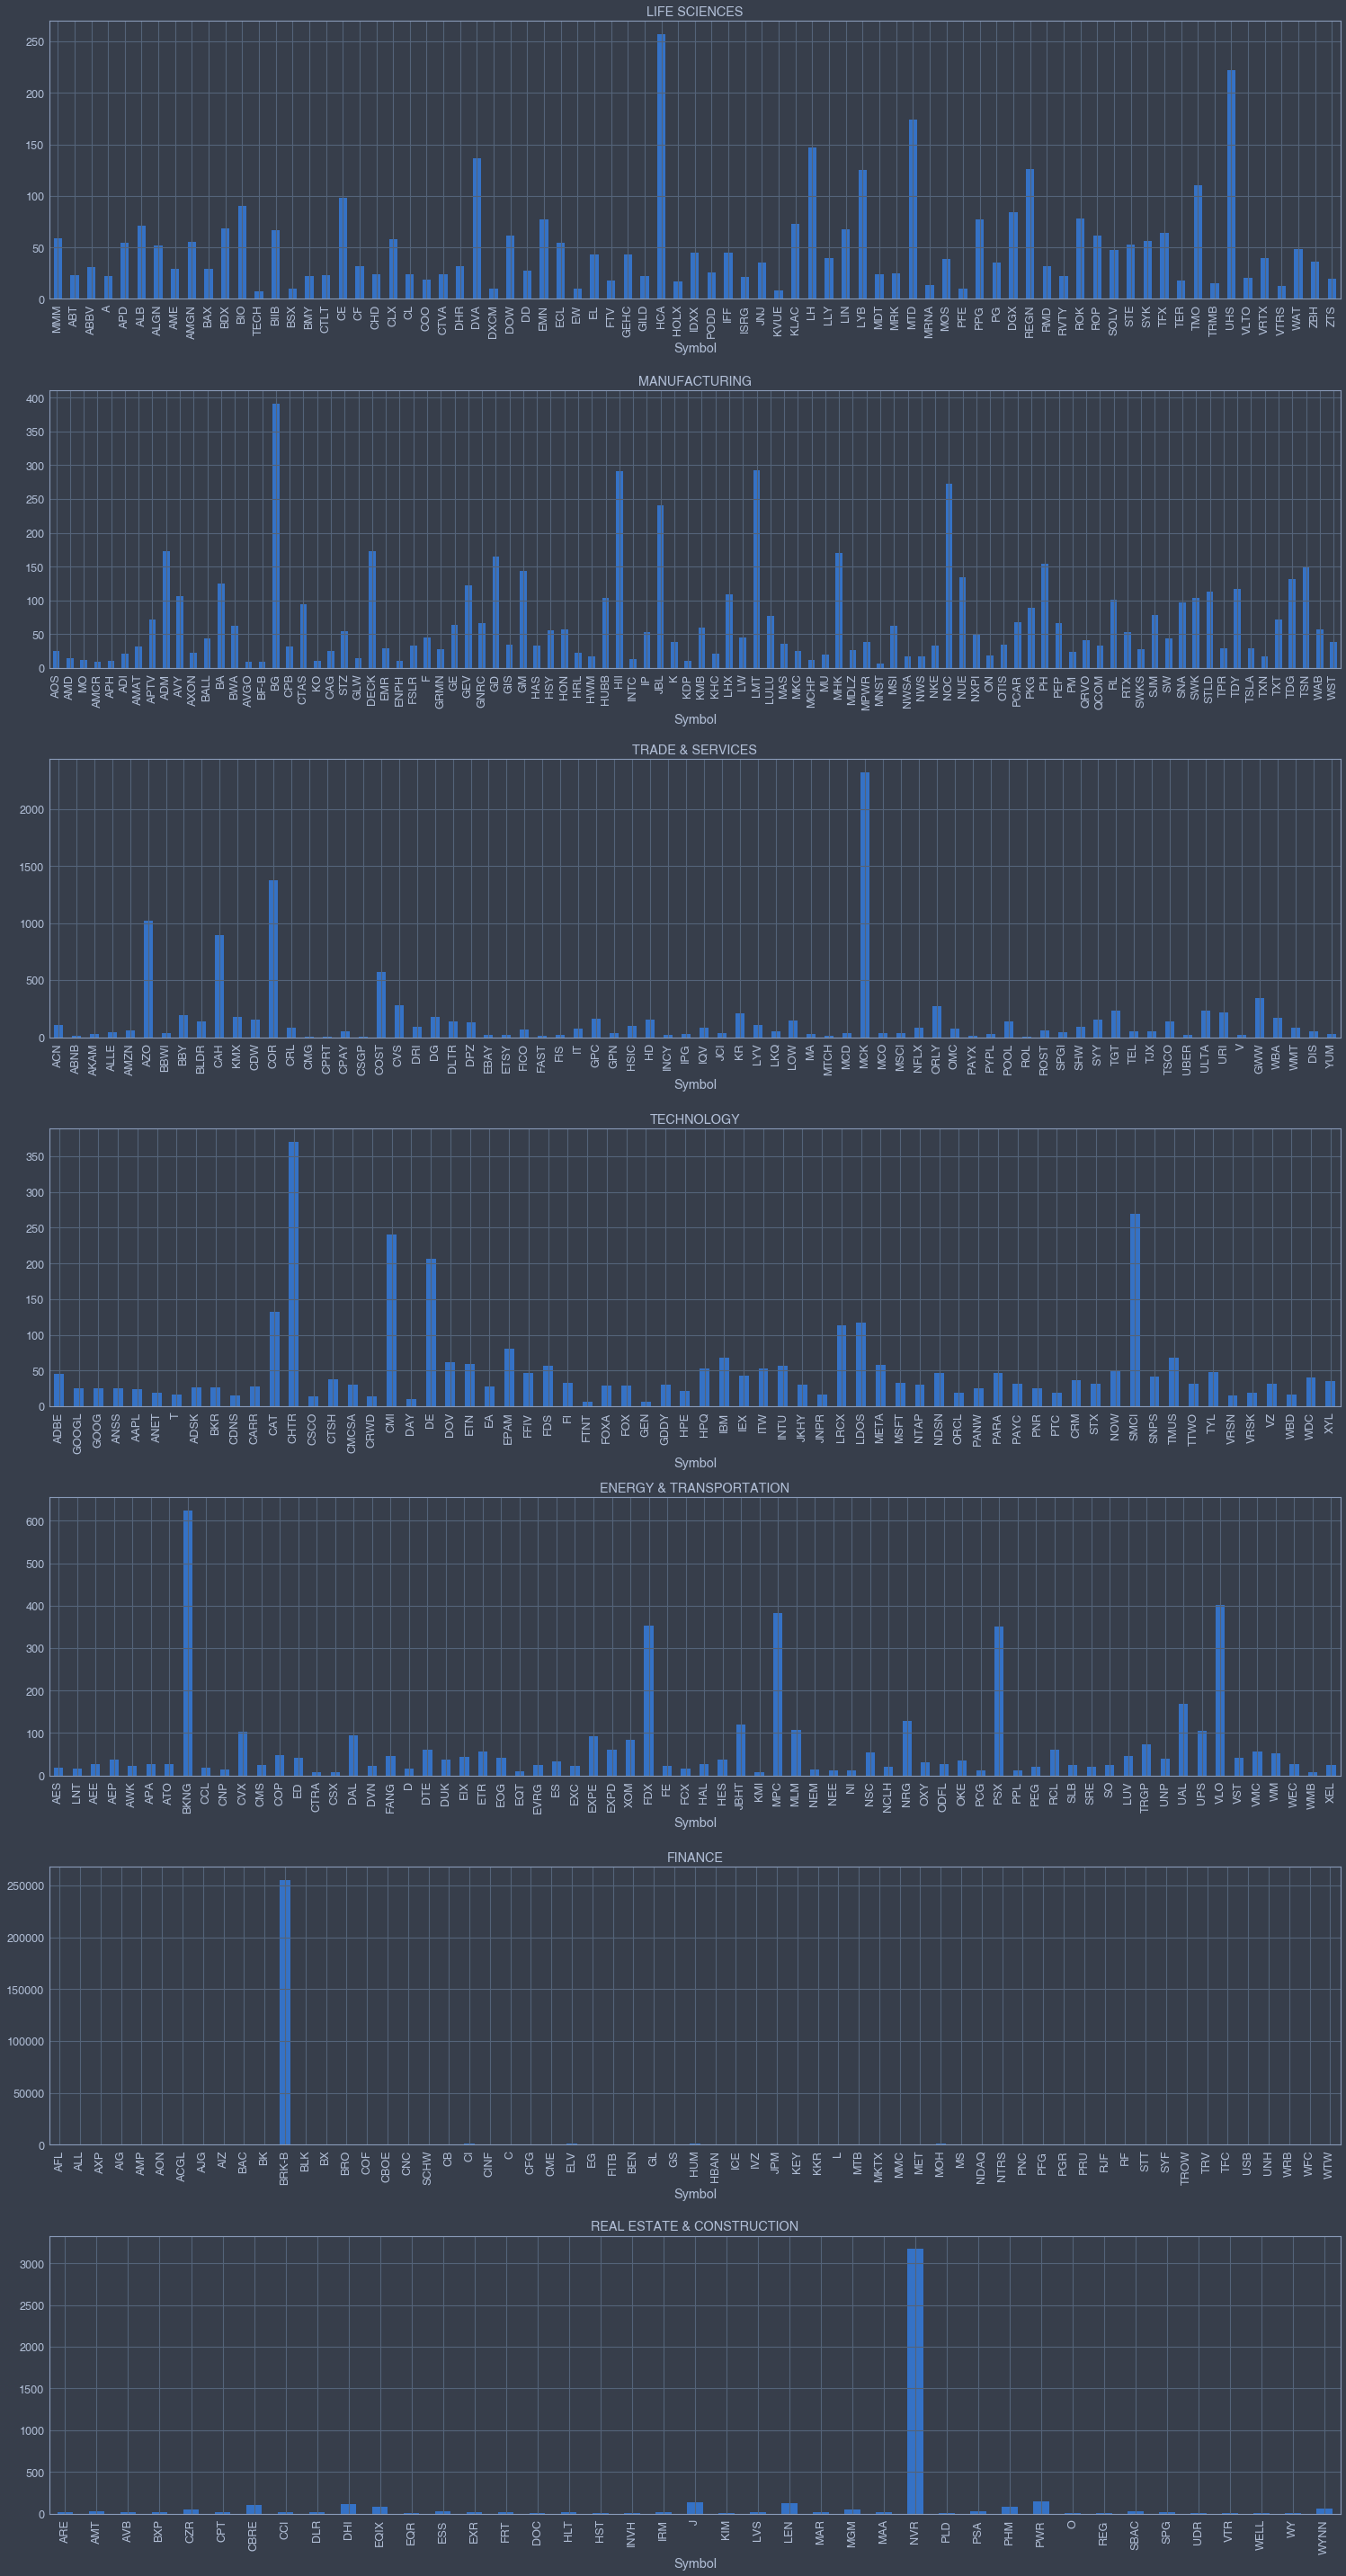

In [60]:
fig, ax = plt.subplots(7, 1, figsize=(21, 40))

for i, sector in enumerate(data['Sector'].unique()):
    if sector is not np.nan:
        data[data['Sector']==sector]['RevenuePerShareTTM'].plot(kind='bar', ax=ax[i])
        ax[i].set_title(sector)
fig.tight_layout()

In [15]:
data[data['Beta']>1].groupby('Sector').count()

,Name,Exchange,Industry,FiscalYearEnd,LatestQuarter,MarketCapitalization,EBITDA,PERatio,PEGRatio,BookValue,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Sector,,,,,,,,,,,,,,,,,,,,,
ENERGY & TRANSPORTATION,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
FINANCE,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
LIFE SCIENCES,15,15,15,15,15,15,15,13,15,15,...,15,15,15,15,15,15,15,15,15,15
MANUFACTURING,19,19,19,19,19,19,19,18,19,19,...,19,19,19,19,19,19,19,19,19,19
REAL ESTATE & CONSTRUCTION,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
TECHNOLOGY,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
TRADE & SERVICES,19,19,19,19,19,19,19,18,19,19,...,19,19,19,19,19,19,19,19,19,19


In [16]:
data[(data['Beta']>1) & (data['Sector']=='TECHNOLOGY')].groupby('Industry').count()

,Name,Exchange,Sector,FiscalYearEnd,LatestQuarter,MarketCapitalization,EBITDA,PERatio,PEGRatio,BookValue,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Industry,,,,,,,,,,,,,,,,,,,,,
AIR-COND & WARM AIR HEATG EQUIP & COMM & INDL REFRIG EQUIP,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
CABLE & OTHER PAY TELEVISION SERVICES,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
COMPUTER COMMUNICATIONS EQUIPMENT,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
CONSTRUCTION MACHINERY & EQUIP,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"CONSTRUCTION, MINING & MATERIALS HANDLING MACHINERY & EQUIP",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ELECTRONIC COMPUTERS,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
MISC INDUSTRIAL & COMMERCIAL MACHINERY & EQUIPMENT,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
OIL & GAS FIELD MACHINERY & EQUIPMENT,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
SERVICES-COMPUTER INTEGRATED SYSTEMS DESIGN,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [8]:
data[(data['PEGRatio']<1) & (data['Beta']>1)]#.groupby('Sector').count()

,AssetType,Name,Description,CIK,Exchange,Currency,Country,Sector,Industry,Address,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Symbol,,,,,,,,,,,,,,,,,,,,,
AMD,Common Stock,Advanced Micro Devices Inc,"Advanced Micro Devices, Inc. (AMD) is an Ameri...",2488.0,NASDAQ,USD,USA,MANUFACTURING,SEMICONDUCTORS & RELATED DEVICES,"2485 AUGUSTINE DRIVE, SANTA CLARA, CA, US",...,11.51,62.93,1.681,227.3,93.11,163.78,152.81,1616310000.0,None,1995-04-27
AIG,Common Stock,American International Group Inc,"American International Group, Inc., also known...",5272.0,NYSE,USD,USA,FINANCE,"FIRE, MARINE & CASUALTY INSURANCE","175 WATER STREET, NEW YORK, NY, US",...,1.49,-,1.089,80.39,55.81,76.54,71.13,663668000.0,2024-06-28,2024-06-14
APA,Common Stock,APA Corporation,APA Corporation is the holding company for Apa...,6769.0,NASDAQ,USD,USA,ENERGY & TRANSPORTATION,CRUDE PETROLEUM & NATURAL GAS,"2000 POST OAK BLVD, STE 100, HOUSTON, TX, US",...,2.143,3.735,3.270,44.81,26.96,29.71,33.15,371192000.0,2024-08-22,2024-07-22
APTV,Common Stock,Aptiv PLC,Aptiv plc is an auto parts company headquarter...,1521332.0,NYSE,USD,USA,MANUFACTURING,MOTOR VEHICLE PARTS & ACCESSORIES,"5 HANOVER QUAY, GRAND CANAL DOCK, DUBLIN, IE",...,1.266,10.01,1.794,113.14,65.13,75.92,80.14,272062000.0,2020-02-19,2020-02-04
BKR,Common Stock,Baker Hughes Co,Baker Hughes Company is an American internatio...,1701605.0,NASDAQ,USD,USA,TECHNOLOGY,OIL & GAS FIELD MACHINERY & EQUIPMENT,"17021 ALDINE WESTFIELD ROAD, HOUSTON, TX, US",...,1.426,9.19,1.399,36.85,27.93,33.48,32.78,997998000.0,2024-05-16,2024-05-03
BK,Common Stock,Bank of New York Mellon,"The Bank of New York Mellon Corporation, commo...",1390777.0,NYSE,USD,USA,FINANCE,STATE COMMERCIAL BANKS,"240 GREENWICH STREET, NEW YORK, NY, US",...,-,-,1.082,65.42,38.39,60.08,53.99,737957000.0,2024-08-02,2024-07-22
BBWI,Common Stock,Bath & Body Works Inc.,None,701985.0,NYSE,USD,USA,TRADE & SERVICES,RETAIL-WOMEN'S CLOTHING STORES,"THREE LIMITED PKWY, P O BOX 16000, COLUMBUS, O...",...,1.654,7.47,1.834,52.76,26.9,43.09,41.33,223231000.0,2024-06-21,2024-06-07
BLDR,Common Stock,Builders FirstSource Inc,"Builders FirstSource, Inc., manufactures and s...",1316835.0,NYSE,USD,USA,TRADE & SERVICES,RETAIL-LUMBER & OTHER BUILDING MATERIALS DEALERS,"2001 BRYAN STREET, SUITE 1600, DALLAS, TX, US",...,1.565,9.79,2.039,214.7,105.23,151.78,162.07,122057000.0,None,None
CZR,Common Stock,Caesars Entertainment Corporation,"Caesars Entertainment, Inc., formerly Eldorado...",1590895.0,NASDAQ,USD,USA,REAL ESTATE & CONSTRUCTION,HOTELS & MOTELS,"100 WEST LIBERTY STREET, SUITE 1150, RENO, NV, US",...,2.84,9.21,2.985,59.5,31.74,36.61,41.25,216053000.0,None,None


In [10]:
data[(data['PEGRatio']<1) & (data['Sector']=='FINANCE')]

,AssetType,Name,Description,CIK,Exchange,Currency,Country,Sector,Industry,Address,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Symbol,,,,,,,,,,,,,,,,,,,,,
AFL,Common Stock,Aflac Incorporated,Aflac Inc. (American Family Life Assurance Com...,4977.0,NYSE,USD,USA,FINANCE,ACCIDENT & HEALTH INSURANCE,"1932 WYNNTON RD, COLUMBUS, GA, US",...,3.017,-,0.947,95.49,70.34,88.88,83.47,568222000.0,2024-06-03,2024-05-21
AIG,Common Stock,American International Group Inc,"American International Group, Inc., also known...",5272.0,NYSE,USD,USA,FINANCE,"FIRE, MARINE & CASUALTY INSURANCE","175 WATER STREET, NEW YORK, NY, US",...,1.49,-,1.089,80.39,55.81,76.54,71.13,663668000.0,2024-06-28,2024-06-14
BK,Common Stock,Bank of New York Mellon,"The Bank of New York Mellon Corporation, commo...",1390777.0,NYSE,USD,USA,FINANCE,STATE COMMERCIAL BANKS,"240 GREENWICH STREET, NEW YORK, NY, US",...,-,-,1.082,65.42,38.39,60.08,53.99,737957000.0,2024-08-02,2024-07-22
CNC,Common Stock,Centene Corp,Centene Corporation is a large publicly traded...,1071739.0,NYSE,USD,USA,FINANCE,HOSPITAL & MEDICAL SERVICE PLANS,"7700 FORSYTH BLVD., ST LOUIS, MO, US",...,0.241,6.6,0.500,81.42,60.83,69.82,73.46,533656000.0,None,None
CI,Common Stock,Cigna Corp,Cigna is an American multinational managed hea...,1739940.0,NYSE,USD,USA,FINANCE,HOSPITAL & MEDICAL SERVICE PLANS,"900 COTTAGE GROVE ROAD, BLOOMFIELD, CT, US",...,0.627,-,0.525,364.21,251.86,335.55,324.17,284074000.0,2024-06-20,2024-09-04
CINF,Common Stock,Cincinnati Financial Corporation,Cincinnati Financial Corporation offers proper...,20286.0,NASDAQ,USD,USA,FINANCE,"FIRE, MARINE & CASUALTY INSURANCE","6200 S GILMORE RD, FAIRFIELD, OH, US",...,1.853,-,0.658,128.23,94.82,117.83,111.77,156240000.0,2024-07-15,2024-06-18
C,Common Stock,Citigroup Inc,Citigroup Inc. is an American multinational in...,831001.0,NYSE,USD,USA,FINANCE,NATIONAL COMMERCIAL BANKS,"388 GREENWICH STREET, NEW YORK, NY, US",...,-,-,1.451,67.81,37.0,63.12,55.32,1925700000.0,2024-08-23,2024-08-05
CFG,Common Stock,"Citizens Financial Group, Inc.","Citizens Financial Group, Inc. is an American ...",759944.0,NYSE,USD,USA,FINANCE,STATE COMMERCIAL BANKS,"870 WESTMINSTER ST, 1 CITIZENS PLZ THIRD FL, P...",...,-,-,1.342,43.96,21.82,36.43,32.51,452962000.0,2024-08-14,2024-07-31


In [7]:
data[data['Industry']=='SERVICES-PREPACKAGED SOFTWARE']

,AssetType,Name,Description,CIK,Exchange,Currency,Country,Sector,Industry,Address,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Symbol,,,,,,,,,,,,,,,,,,,,,
ADBE,Common Stock,Adobe Systems Incorporated,Adobe Inc. is an American multinational comput...,796343.0,NASDAQ,USD,USA,TECHNOLOGY,SERVICES-PREPACKAGED SOFTWARE,"345 PARK AVE, SAN JOSE, CA, US",...,10.52,29.33,1.297,638.25,433.97,512.42,547.17,443400000.0,None,2005-03-24
ANSS,Common Stock,ANSYS Inc,"Ansys, Inc. is an American company based in Ca...",1013462.0,NASDAQ,USD,USA,TECHNOLOGY,SERVICES-PREPACKAGED SOFTWARE,"2600 ANSYS DRIVE, SOUTHPOINTE, CANONSBURG, PA, US",...,12.72,40.65,1.108,364.31,258.01,324.84,321.21,87300000.0,None,None
ADSK,Common Stock,Autodesk Inc,"Autodesk, Inc. is an American multinational so...",769397.0,NASDAQ,USD,USA,TECHNOLOGY,SERVICES-PREPACKAGED SOFTWARE,"111 MCINNIS PKWY, SAN RAFAEL, CA, US",...,9.29,40.31,1.485,279.53,192.01,230.93,232.68,215509000.0,None,2005-03-22
CDNS,Common Stock,Cadence Design Systems Inc,"Cadence Design Systems, Inc., headquartered in...",813672.0,NASDAQ,USD,USA,TECHNOLOGY,SERVICES-PREPACKAGED SOFTWARE,"2655 SEELY AVENUE BLDG 5, SAN JOSE, CA, US",...,20.29,56.7,1.033,328.99,217.77,300.3,285.82,273820000.0,None,None


In [9]:
data['RevenuePerShareTTM'].describe()

count       289.000000
mean        966.700194
std       15019.554067
min           2.953000
25%          19.560000
50%          37.600000
75%          80.280000
max      255402.660000
Name: RevenuePerShareTTM, dtype: float64

In [9]:
data['ProfitMargin'].describe()

count    313.000000
mean       0.135191
std        0.143140
min       -1.162000
25%        0.062200
50%        0.131000
75%        0.196000
max        0.650000
Name: ProfitMargin, dtype: float64

In [10]:
data['ReturnOnAssetsTTM'].describe()

count    361.000000
mean       0.066311
std        0.051765
min       -0.154000
25%        0.029500
50%        0.053100
75%        0.088300
max        0.309000
Name: ReturnOnAssetsTTM, dtype: float64

In [12]:
data[data['EPS']<0][['Name', 'PERatio', 'PEGRatio', 'Beta', 'DividendPerShare', 'DividendYield']]

,Name,PERatio,PEGRatio,Beta,DividendPerShare,DividendYield
Symbol,,,,,,
MMM,3M Company,NaN,1.905,1.001,8.79,0.0267
BAX,Baxter International Inc,NaN,1.696,0.574,16.04,0.0327
BIO,Bio-Rad Laboratories Inc,NaN,1.190,0.930,317.32,NaN
BA,The Boeing Company,NaN,6.530,1.562,-27.73,NaN
BMY,Bristol-Myers Squibb Company,NaN,31.350,0.439,8.13,0.0558
CTLT,Catalent Inc,NaN,2.057,1.161,19.96,NaN
DLTR,Dollar Tree Inc,NaN,2.138,0.886,33.83,NaN
ES,Eversource Energy,NaN,2.006,0.604,41.39,0.0443
HAS,Hasbro Inc,NaN,0.780,0.607,8.41,0.0434


In [19]:
data[data['RevenuePerShareTTM']==data['RevenuePerShareTTM'].max()][clmns]

,Name,Beta,DividendYield
Symbol,,,
BRK-B,Berkshire Hathaway Inc,0.869,NaN


In [20]:
data[data['ProfitMargin']==data['ProfitMargin'].max()][clmns]

,Name,Beta,DividendYield
Symbol,,,
EMR,Emerson Electric Company,1.316,0.018


In [32]:
data[data['OperatingMarginTTM']==data['OperatingMarginTTM'].min()][clmns]

,Name,PERatio,PEGRatio,Beta,DividendPerShare,DividendYield
Symbol,,,,,,
MRNA,Moderna Inc,NaN,0.0,1.662,30.5,NaN


In [17]:
data[data['OperatingMarginTTM']==data['OperatingMarginTTM'].max()][clmns]

,Name,Beta,DividendYield
Symbol,,,
MAR,Marriott International Inc,1.601,0.0118


In [31]:
data[data['ReturnOnAssetsTTM']==data['ReturnOnAssetsTTM'].min()][clmns]

,Name,PERatio,PEGRatio,Beta,DividendPerShare,DividendYield
Symbol,,,,,,
MRNA,Moderna Inc,NaN,0.0,1.662,30.5,NaN


In [28]:
betas = data[data['RevenuePerShareTTM']>data['RevenuePerShareTTM'].quantile(0.75)]['Beta']
bins = pd.qcut(betas, 4)
results = (pd.Series(betas).groupby(bins).agg(['count', 'min', 'max']).reset_index())
results

,Beta,count,min,max
0,"(0.43, 0.694]",18,0.431,0.683
1,"(0.694, 0.988]",18,0.704,0.988
2,"(0.988, 1.318]",17,0.989,1.305
3,"(1.318, 2.039]",18,1.331,2.039


In [15]:
profit_margin = data['ProfitMargin']
bins = pd.qcut(profit_margin, 8)
results = (pd.Series(profit_margin).groupby(bins).agg(['count', 'min', 'max']).reset_index())
results

,ProfitMargin,count,min,max
0,"(-1.1629999999999998, 0.033]",46,-1.1620,0.0330
1,"(0.033, 0.0638]",46,0.0332,0.0638
2,"(0.0638, 0.104]",44,0.0661,0.1040
3,"(0.104, 0.132]",45,0.1050,0.1320
4,"(0.132, 0.168]",45,0.1330,0.1680
5,"(0.168, 0.199]",45,0.1690,0.1990
6,"(0.199, 0.263]",48,0.2020,0.2630
7,"(0.263, 0.65]",42,0.2650,0.6500


In [16]:
cat = data.copy()

In [17]:
cat['profit_margin_bins'] = bins
cat.groupby(['Sector', 'profit_margin_bins']).count()['Name'].to_frame()

Name
Sector                     profit_margin_bins                
ENERGY & TRANSPORTATION    (-1.1629999999999998, 0.033]     2
                           (0.033, 0.0638]                 10
                           (0.0638, 0.104]                  7
                           (0.104, 0.132]                  10
                           (0.132, 0.168]                   7
                           (0.168, 0.199]                   4
                           (0.199, 0.263]                   8
                           (0.263, 0.65]                    4
FINANCE                    (-1.1629999999999998, 0.033]     6
                           (0.033, 0.0638]                  2
                           (0.0638, 0.104]                  4
                           (0.104, 0.132]                   2
                           (0.132, 0.168]                   4
                           (0.168, 0.199]                  11
                           (0.199, 0.263]                   9
                           (0.263, 0.65]                    9
LIFE SCIENCES              (-1.1629999999999998, 0.033]    10
                           (0.033, 0.0638]                  7
                           (0.0638, 0.104]                  8
                           (0.104, 0.132]                   9
                           (0.132, 0.168]                   2
                           (0.168, 0.199]                  11
                           (0.199, 0.263]                   5
                           (0.263, 0.65]                    3
MANUFACTURING              (-1.1629999999999998, 0.033]    11
                           (0.033, 0.0638]                 12
                           (0.0638, 0.104]                 13
                           (0.104, 0.132]                   9
                           (0.132, 0.168]                  11
                           (0.168, 0.199]                   2
                           (0.199, 0.263]                  12
                           (0.263, 0.65]                    5
REAL ESTATE & CONSTRUCTION (-1.1629999999999998, 0.033]     1
                           (0.033, 0.0638]                  4
                           (0.0638, 0.104]                  2
                           (0.104, 0.132]                   3
                           (0.132, 0.168]                   4
                           (0.168, 0.199]                   4
                           (0.199, 0.263]                   3
                           (0.263, 0.65]                    7
TECHNOLOGY                 (-1.1629999999999998, 0.033]     3
                           (0.033, 0.0638]                  5
                           (0.0638, 0.104]                  3
                           (0.104, 0.132]                   5
                           (0.132, 0.168]                   9
                           (0.168, 0.199]                  11
                           (0.199, 0.263]                   9
                           (0.263, 0.65]                    6
TRADE & SERVICES           (-1.1629999999999998, 0.033]    13
                           (0.033, 0.0638]                  6
                           (0.0638, 0.104]                  7
                           (0.104, 0.132]                   7
                           (0.132, 0.168]                   8
                           (0.168, 0.199]                   2
                           (0.199, 0.263]                   2
                           (0.263, 0.65]                    8

In [18]:
op_margin = data['OperatingMarginTTM']
bins = pd.qcut(op_margin, 8)
results = (pd.Series(op_margin).groupby(bins).agg(['count', 'min', 'max']).reset_index())
results

,OperatingMarginTTM,count,min,max
0,"(-5.6610000000000005, 0.0693]",47,-5.660,0.0693
1,"(0.0693, 0.112]",44,0.070,0.1120
2,"(0.112, 0.157]",47,0.115,0.1570
3,"(0.157, 0.193]",43,0.158,0.1930
4,"(0.193, 0.222]",45,0.195,0.2220
5,"(0.222, 0.28]",47,0.223,0.2800
6,"(0.28, 0.338]",43,0.281,0.3380
7,"(0.338, 0.703]",45,0.341,0.7030


In [19]:
cat['op_margin_bins'] = bins
cat.groupby(['Sector', 'op_margin_bins']).count()['Name'].to_frame()

Name
Sector                     op_margin_bins                     
ENERGY & TRANSPORTATION    (-5.6610000000000005, 0.0693]     4
                           (0.0693, 0.112]                   5
                           (0.112, 0.157]                    6
                           (0.157, 0.193]                    8
                           (0.193, 0.222]                    4
                           (0.222, 0.28]                    11
                           (0.28, 0.338]                     8
                           (0.338, 0.703]                    6
FINANCE                    (-5.6610000000000005, 0.0693]     5
                           (0.0693, 0.112]                   3
                           (0.112, 0.157]                    4
                           (0.157, 0.193]                    3
                           (0.193, 0.222]                    3
                           (0.222, 0.28]                     7
                           (0.28, 0.338]                     8
                           (0.338, 0.703]                   14
LIFE SCIENCES              (-5.6610000000000005, 0.0693]     5
                           (0.0693, 0.112]                   6
                           (0.112, 0.157]                   13
                           (0.157, 0.193]                    6
                           (0.193, 0.222]                    8
                           (0.222, 0.28]                     8
                           (0.28, 0.338]                     6
                           (0.338, 0.703]                    3
MANUFACTURING              (-5.6610000000000005, 0.0693]    14
                           (0.0693, 0.112]                  13
                           (0.112, 0.157]                   10
                           (0.157, 0.193]                   10
                           (0.193, 0.222]                   10
                           (0.222, 0.28]                     8
                           (0.28, 0.338]                     7
                           (0.338, 0.703]                    3
REAL ESTATE & CONSTRUCTION (-5.6610000000000005, 0.0693]     2
                           (0.0693, 0.112]                   1
                           (0.112, 0.157]                    2
                           (0.157, 0.193]                    5
                           (0.193, 0.222]                    4
                           (0.222, 0.28]                     0
                           (0.28, 0.338]                     9
                           (0.338, 0.703]                    5
TECHNOLOGY                 (-5.6610000000000005, 0.0693]     2
                           (0.0693, 0.112]                  10
                           (0.112, 0.157]                    4
                           (0.157, 0.193]                    3
                           (0.193, 0.222]                   11
                           (0.222, 0.28]                    10
                           (0.28, 0.338]                     5
                           (0.338, 0.703]                    6
TRADE & SERVICES           (-5.6610000000000005, 0.0693]    15
                           (0.0693, 0.112]                   6
                           (0.112, 0.157]                    8
                           (0.157, 0.193]                    8
                           (0.193, 0.222]                    5
                           (0.222, 0.28]                     3
                           (0.28, 0.338]                     0
                           (0.338, 0.703]                    8

In [21]:
roa = data['ReturnOnAssetsTTM']
bins = pd.qcut(op_margin, 8)
results = (pd.Series(roa).groupby(bins).agg(['count', 'min', 'max']).reset_index())
results

,OperatingMarginTTM,count,min,max
0,"(-5.6610000000000005, 0.0693]",47,-0.1540,0.0838
1,"(0.0693, 0.112]",44,-0.0157,0.1200
2,"(0.112, 0.157]",47,0.0092,0.1700
3,"(0.157, 0.193]",43,0.0082,0.3090
4,"(0.193, 0.222]",45,0.0093,0.2260
5,"(0.222, 0.28]",47,0.0035,0.1710
6,"(0.28, 0.338]",43,0.0070,0.2260
7,"(0.338, 0.703]",45,0.0089,0.2690


In [28]:
cat['roa_bins'] = bins
cat.groupby(['Sector', 'roa_bins']).count()['Name'].to_frame()

Name
Sector                     roa_bins                           
ENERGY & TRANSPORTATION    (-5.6610000000000005, 0.0693]     4
                           (0.0693, 0.112]                   5
                           (0.112, 0.157]                    6
                           (0.157, 0.193]                    8
                           (0.193, 0.222]                    4
                           (0.222, 0.28]                    11
                           (0.28, 0.338]                     8
                           (0.338, 0.703]                    6
FINANCE                    (-5.6610000000000005, 0.0693]     5
                           (0.0693, 0.112]                   3
                           (0.112, 0.157]                    4
                           (0.157, 0.193]                    3
                           (0.193, 0.222]                    3
                           (0.222, 0.28]                     7
                           (0.28, 0.338]                     8
                           (0.338, 0.703]                   14
LIFE SCIENCES              (-5.6610000000000005, 0.0693]     5
                           (0.0693, 0.112]                   6
                           (0.112, 0.157]                   13
                           (0.157, 0.193]                    6
                           (0.193, 0.222]                    8
                           (0.222, 0.28]                     8
                           (0.28, 0.338]                     6
                           (0.338, 0.703]                    3
MANUFACTURING              (-5.6610000000000005, 0.0693]    14
                           (0.0693, 0.112]                  13
                           (0.112, 0.157]                   10
                           (0.157, 0.193]                   10
                           (0.193, 0.222]                   10
                           (0.222, 0.28]                     8
                           (0.28, 0.338]                     7
                           (0.338, 0.703]                    3
REAL ESTATE & CONSTRUCTION (-5.6610000000000005, 0.0693]     2
                           (0.0693, 0.112]                   1
                           (0.112, 0.157]                    2
                           (0.157, 0.193]                    5
                           (0.193, 0.222]                    4
                           (0.222, 0.28]                     0
                           (0.28, 0.338]                     9
                           (0.338, 0.703]                    5
TECHNOLOGY                 (-5.6610000000000005, 0.0693]     2
                           (0.0693, 0.112]                  10
                           (0.112, 0.157]                    4
                           (0.157, 0.193]                    3
                           (0.193, 0.222]                   11
                           (0.222, 0.28]                    10
                           (0.28, 0.338]                     5
                           (0.338, 0.703]                    6
TRADE & SERVICES           (-5.6610000000000005, 0.0693]    15
                           (0.0693, 0.112]                   6
                           (0.112, 0.157]                    8
                           (0.157, 0.193]                    8
                           (0.193, 0.222]                    5
                           (0.222, 0.28]                     3
                           (0.28, 0.338]                     0
                           (0.338, 0.703]                    8

## Overview

In [36]:
data.groupby(['Sector']).count()['Name'].to_frame().sort_values('Name', ascending=False)

,Name
Sector,
MANUFACTURING,94
LIFE SCIENCES,77
TRADE & SERVICES,72
ENERGY & TRANSPORTATION,70
TECHNOLOGY,66
FINANCE,63
REAL ESTATE & CONSTRUCTION,41


In [17]:
data.groupby('Sector').agg({'Name': 'count',
                            'MarketCapitalization': 'sum',
                            'EBITDA': 'sum',
                            'BookValue': 'sum',
                            'DividendYield': 'mean',
                            'EPS': 'mean',
                           })\
                      .sort_values('MarketCapitalization', ascending=False)

,Name,MarketCapitalization,EBITDA,BookValue,DividendYield,EPS
Sector,,,,,,
TECHNOLOGY,66,1.648618e+13,9.375656e+11,2037.168,0.017412,6.740758
TRADE & SERVICES,72,7.490846e+12,4.548184e+11,1059.010,0.020474,10.147183
MANUFACTURING,94,6.406042e+12,3.960898e+11,3195.984,0.022269,6.257849
LIFE SCIENCES,77,5.991994e+12,3.818559e+11,3285.638,0.019939,5.206711
FINANCE,63,5.772113e+12,2.948112e+11,401978.580,0.024617,10.495079
ENERGY & TRANSPORTATION,70,3.766430e+12,5.188465e+11,2319.107,0.028740,7.538000
REAL ESTATE & CONSTRUCTION,41,1.400544e+12,1.056604e+11,2738.348,0.030859,16.145366


## Assets Filter

In [23]:
data[  (data['PERatio']<16)
     & (data['Beta']>1)
     & (data['PEGRatio']<1)
     & (data['BookValue']>30)
     & ((data['DividendYield'] >= 0.02) | (data['DividendYield'] <= 0.06))
     & (data['EPS']>0)
     & (data['ProfitMargin']>0.07)
     & (data['OperatingMarginTTM']>0.15)
     & (data['ReturnOnAssetsTTM']>0.05)
    ]

,Name,Exchange,Sector,Industry,FiscalYearEnd,LatestQuarter,MarketCapitalization,EBITDA,PERatio,PEGRatio,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Symbol,,,,,,,,,,,,,,,,,,,,,
COP,ConocoPhillips,NYSE,ENERGY & TRANSPORTATION,PETROLEUM REFINING,December,2024-03-31,1.290754e+11,2.428700e+10,12.55,0.721,...,2.957,6.48,1.249,134.54,105.08,114.17,117.16,1.164310e+09,2024-06-03,2024-05-10
DHI,DR Horton Inc,NYSE,REAL ESTATE & CONSTRUCTION,OPERATIVE BUILDERS,September,2024-06-30,5.768952e+10,6.516900e+09,11.91,0.599,...,1.457,8.53,1.711,180.15,99.43,148.54,142.41,3.260400e+08,2024-08-08,2024-08-01
PHM,PulteGroup Inc,NYSE,REAL ESTATE & CONSTRUCTION,OPERATIVE BUILDERS,December,2024-06-30,2.566034e+10,3.721209e+09,9.44,0.339,...,1.532,6.8,1.615,135.62,68.43,116.24,105.82,2.075240e+08,2024-07-02,2024-06-18
